In [1]:
import pandas as pd
import numpy as np
from string import digits
import matplotlib.pyplot as plt

energy = pd.read_excel('En_In.xls', header=16)
energy['Country'] = energy['Unnamed: 1']
energy = energy[['Country', 'Energy Supply', 'Energy Supply per capita', 'Renewable Electricity Production']][1:228]
energy

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,321,10,78.6693
2,Albania,102,35,100
3,Algeria,1959,51,0.55101
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.6957
...,...,...,...,...
223,Viet Nam,2554,28,45.3215
224,Wallis and Futuna Islands,0,26,0
225,Yemen,344,13,0
226,Zambia,400,26,99.7147


In [2]:
energy = energy.replace(r'\.', np.nan, regex=True)
energy['Energy Supply'] = energy['Energy Supply']*(10**6)
energy

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,3.210000e+08,10.0,78.669280
2,Albania,1.020000e+08,35.0,100.000000
3,Algeria,1.959000e+09,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
223,Viet Nam,2.554000e+09,28.0,45.321520
224,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
225,Yemen,3.440000e+08,13.0,0.000000
226,Zambia,4.000000e+08,26.0,99.714670


In [18]:
renameDict = {'Korea, Rep.': 'South Korea',
              'Iran, Islamic Rep.': 'Iran',
              'Iran (Islamic Republic of)': 'Iran',
              'Hong Kong SAR, China': 'Hong Kong',
              'Republic of Korea': 'South Korea',
              'United States of America': 'United States',
              'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
              'China, Hong Kong Special Administrative Region': 'Hong Kong'}
energy = energy.replace(renameDict)
energy

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,3.210000e+08,10.0,78.669280
2,Albania,1.020000e+08,35.0,100.000000
3,Algeria,1.959000e+09,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
223,Viet Nam,2.554000e+09,28.0,45.321520
224,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
225,Yemen,3.440000e+08,13.0,0.000000
226,Zambia,4.000000e+08,26.0,99.714670


In [16]:
gpd = pd.read_csv('gpd.csv', header=4)
gpd = gpd.replace(renameDict)
gpd = gpd.rename(columns={"Country Name": "Country"})
gpd = pd.concat([gpd.iloc[:, :4], gpd.iloc[:, 50:]], axis=1)
gpd.shape

(264, 14)

In [5]:
scimagojr = pd.read_excel('scimagojr.xlsx')[:15].replace(renameDict)
#scimagojr = scimagojr.iloc[:, 1:]
scimagojr

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [6]:
df = pd.merge(scimagojr, energy, on="Country", how='outer')
df = pd.merge(df, gpd, on="Country", how='outer')
df = df.set_index("Country")
df = df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])[:15]
df.shape

(15, 20)

In [7]:
def task_eight():
    years = [str(x) for x in range(2006, 2016)]
    return df[years].mean(axis=1, skipna=True).sort_values(ascending=False)


def task_nine():
    return "France", df.loc["France"]['2015'] - df.loc["France"]['2006']


def task_ten():
    res = list(df.sort_values("Renewable Electricity Production", ascending=False).index.values)[0]
    return res, df.loc[res]["Renewable Electricity Production"]


def task_eleven():
    df["Population"] = df["Energy Supply"] / df["Energy Supply per capita"]
    res = list(df["Population"].sort_values(ascending=False).index.values)[4]
    return res, df.loc[res]["Population"]


def task_twelve():
    df["CitPerCap"] = df["Citable documents"] / df["Population"]
    return df["Energy Supply per capita"].corr(df['CitPerCap'], method="pearson")


def task_thirteen():
    temp = df["Renewable Electricity Production"].median(axis=0)
    df["renew"] = df.apply(lambda x: 1 if x["Renewable Electricity Production"] > temp else 0, axis=1)
    df.sort_values(by='Rank')
    return df["renew"]


def task_forteen():
    ContinentDict = {'China': 'Asia',
                     'United States': 'North America',
                     'Japan': 'Asia',
                     'United Kingdom': 'Europe',
                     'Russian Federation': 'Europe',
                     'Canada': 'North America',
                     'Germany': 'Europe',
                     'India': 'Asia',
                     'France': 'Europe',
                     'South Korea': 'Asia',
                     'Italy': 'Europe',
                     'Spain': 'Europe',
                     'Iran': 'Asia',
                     'Australia': 'Australia',
                     'Brazil': 'South America'}
    temp = pd.DataFrame(columns=['size', 'sum', 'mean', 'std'])
    df['Population'] = df['Energy Supply'] / df['Energy Supply per capita']
    for elem, val in df.groupby(ContinentDict):
        temp.loc[elem] = [len(val), val['Population'].sum(), val['Population'].mean(), val['Population'].std()]
    temp = temp.astype({"size": int})
    return temp


def task_fifteen():
    colors = ['blue', 'green', 'yellow'] * 5
    x, y = df["Rank"], df["Renewable Electricity Production"]
    for i, text in enumerate(list(df.index)):
        plt.annotate(text, (x[i], y[i]))
    plt.scatter(x=x, y=y, s=df['2015'] / 10000000000, alpha=0.4, c=colors)
    plt.xticks([i for i in range(0, len(list(df.index)) + 1)])
    plt.gcf().set_size_inches((15, 5))
    plt.show()

In [8]:
task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [9]:
task_nine()

('France', 153345695364.24023)

In [17]:
task_ten()

('Brazil', 69.64803)

In [10]:
task_eleven()

('Russian Federation', 143500000.0)

In [11]:
task_twelve()

0.7940010435442947

In [12]:
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: renew, dtype: int64

In [13]:
task_forteen()

,size,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


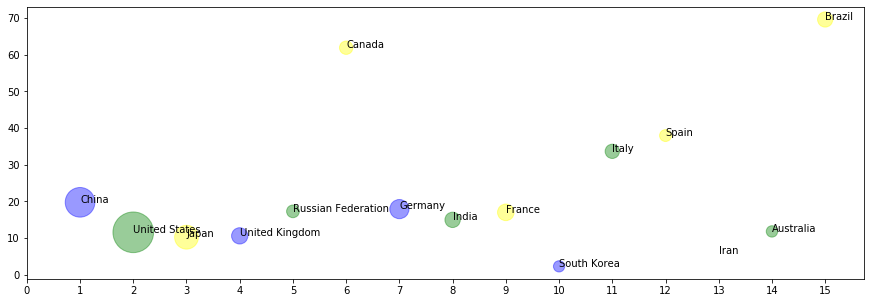

In [14]:
task_fifteen()